<a href="https://colab.research.google.com/github/Aman7Rathore/AirBNB-EDA-/blob/main/AirBnb_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CAPSTONE 1/Airbnb NYC 2019.csv")

In [ ]:
df.shape

(48895, 16)

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Since we don't have to make a ML model we can skip the conversion part of datatypes**

In [ ]:
# Check the count of NULL values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#**[ DATA CLEANING ]**#

In [ ]:
# Replace NaN values with '0' if any
df = df.fillna(0)

# We need to remove the null values
df = df.dropna()


In [ ]:
# Drop Duplicates if any
df.duplicated().sum()
df.drop_duplicates(inplace = True)

In [ ]:
# Drop unnecessary features
df.drop(['name','id','host_id','last_review','host_name'],axis=1,inplace=True)

In [ ]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

#**DATA VISUALIZATION**#

**Plot all the Neighbourhood Groups**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'NEIGHBOURHOOD_GROUPS')

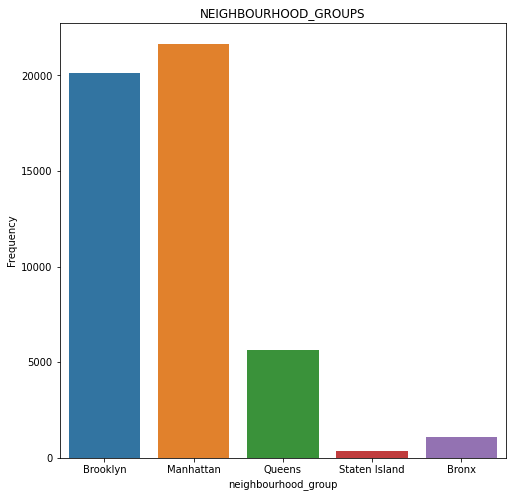

In [ ]:
plt.figure(figsize=(8,8))

sns.countplot(df['neighbourhood_group'])

plt.ylabel('Frequency')

plt.title('NEIGHBOURHOOD_GROUPS')


**Room Type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Room Type')

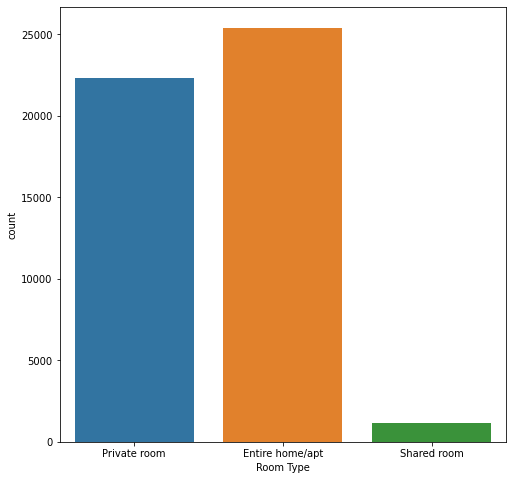

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(df['room_type'])
plt.xlabel('Room Type')

#**Relation Between Neighbourhood_group and Availabilty of Rooms**#

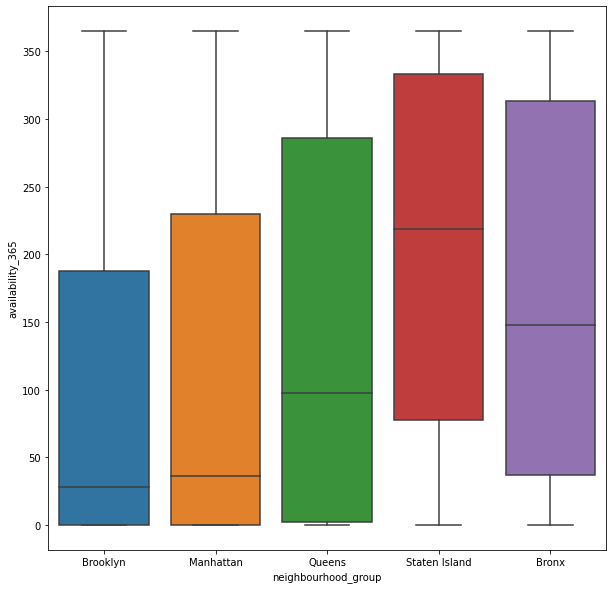

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='neighbourhood_group',y='availability_365')

Map of Neighbourhood_Group and Availability of Rooms

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


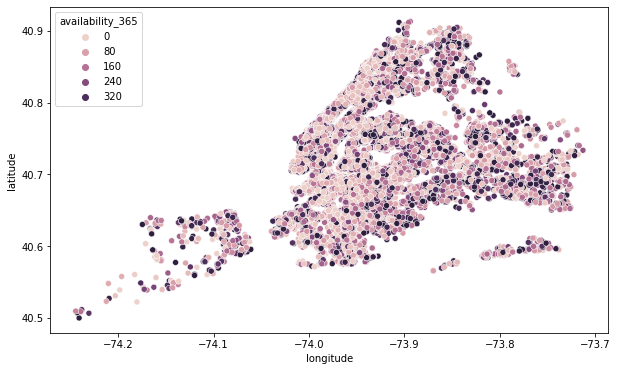

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.availability_365)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


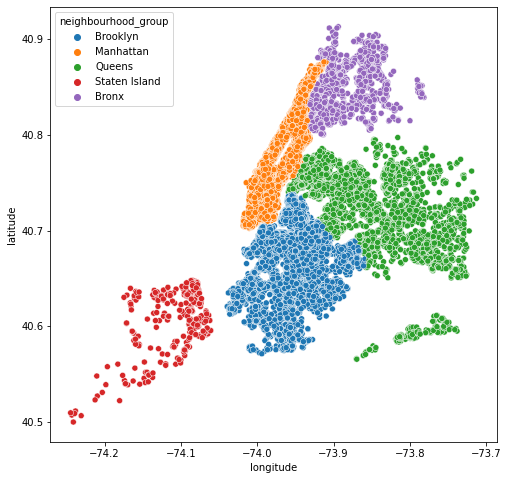

In [ ]:
plt.figure(figsize=(8,8))

sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)

**Availability of rooms an the basis of ROOM-TYPE**

In [ ]:
x = df.groupby(['room_type'])['availability_365'].agg(np.mean)

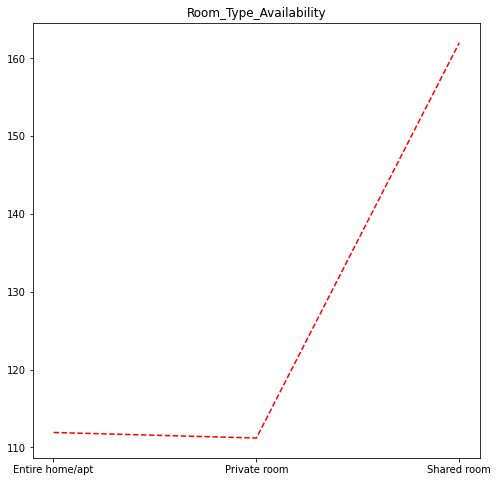

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(x,'r--')
plt.title('Room_Type_Availability')
plt.show()

**Price of rentals in different neighbourhood groups **

In [ ]:
y = df.groupby(['neighbourhood_group'])['price'].agg(np.mean)

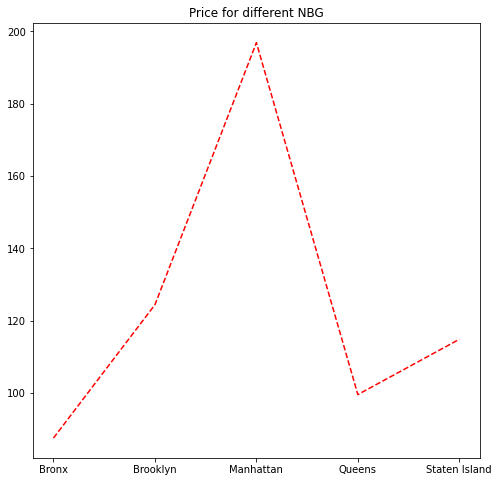

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(y,'r--')
plt.title('Price for different NBG')
plt.show()

**Even though the no. of rentals in staten island is less compared to Queens and Bronx the average price is quite higher compared to other two NBG**

In [ ]:
# WORDCLOUD

from wordcloud import WordCloud

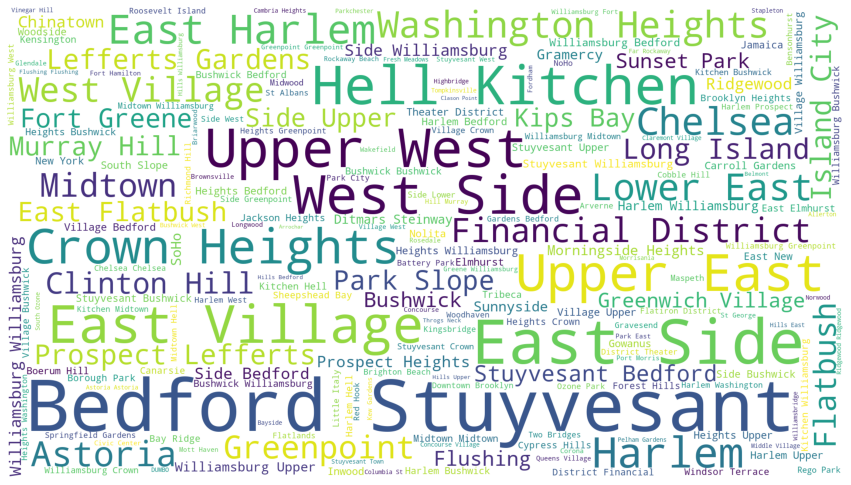

In [ ]:
plt.figure(figsize=(15,15))

wordcloud = WordCloud(    background_color='white',
                      
                          width = 1920,
                          
                          height = 1080).generate(' '.join(df.neighbourhood))


plt.imshow(wordcloud)
plt.axis('off')
plt.show()